In [ ]:
# import tensorflow as tf
# from keras.datasets import cifar100
# from tensorflow.keras.layers import Input, Dropout, Flatten, Dense, Activation, Lambda, Conv2D, MaxPool2D, GlobalAveragePooling2D
# from tensorflow.keras.models import Model
# from tensorflow import keras
# import numpy as np
# from tensorflow.keras.utils import plot_model
# import datetime, os
# import time
# import pandas as pd
# import seaborn as sns
# from tensorflow.keras.applications import VGG19

# %load_ext tensorboard

In [ ]:
from deakin.edu.au.data import Cifar100
import deakin.edu.au.models as models
import deakin.edu.au.metrics as metrics
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from graphviz import Digraph
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.patches import Rectangle
import numpy as np

%load_ext autoreload
%autoreload 2


In [2]:
#Load dataset
dataset = Cifar100()
num_classes = [dataset.num_classes_l0, dataset.num_classes_l1, dataset.num_classes_l2]
u = dataset.draw_taxonomy()
u.view()

# Set variables

batch = 128
epochs = 50
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
performance_callback = models.performance_callback(dataset.X_val, dataset.y_val, dataset.taxonomy)

checkpoint_filepath = '/tmp/checkpoint_new'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True)


# Motivation plots

In [ ]:
l0_model = models.get_Classifier_model(num_classes[0], dataset.image_size)
l0_model.summary()
#train model
history_l0_model = l0_model.fit(dataset.X_train, 
                    dataset.y_train[0],
                    validation_data = (dataset.X_val, dataset.y_val[0]), 
                    batch_size=batch, 
                    epochs=epochs,
                    callbacks=[early_stopping_callback]
                    )
plot_model(l0_model)


In [ ]:
l1_model = models.get_Classifier_model(num_classes[1], dataset.image_size)
l1_model.summary()
#train model
history_l1_model = l1_model.fit(dataset.X_train, 
                    dataset.y_train[1],
                    validation_data = (dataset.X_val, dataset.y_val[1]), 
                    batch_size=batch, 
                    epochs=epochs,
                    callbacks=[early_stopping_callback]
                    )
plot_model(l1_model)


In [ ]:
l2_model = models.get_Classifier_model(num_classes[2], dataset.image_size)
l2_model.summary()
#train model
history_l2_model = l2_model.fit(dataset.X_train, 
                    dataset.y_train[2],
                    validation_data = (dataset.X_val, dataset.y_val[2]), 
                    batch_size=batch, 
                    epochs=epochs,
                    callbacks=[early_stopping_callback]
                    )
plot_model(l2_model)


In [ ]:
l0_pred = np.argmax(l0_model.predict(dataset.X_test))
l1_pred = np.argmax(l1_model.predict(dataset.X_test))
l2_pred = np.argmax(l2_model.predict(dataset.X_test))
# baseline_model_pred = baseline_model.predict(dataset.X_test)
# baseline_model_pred = models.get_pred_indexes(baseline_model_pred)


In [ ]:
metrics.get_accuracy(mnets_model_pred, dataset.y_test)

In [ ]:
metrics.get_accuracy(baseline_model_pred, dataset.y_test)

# Training all models

Model: "mout_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
vgg19 (Functional)              (None, None, None, 5 20024384    main_input[0][0]                 
__________________________________________________________________________________________________
flatten (Flatten)               (None, 512)          0           vgg19[0][0]                      
__________________________________________________________________________________________________
out_level_0 (Dense)             (None, 2)            1026        flatten[0][0]                    
_________________________________________________________________________________________

2021-07-21 19:27:01.299046: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-07-21 19:27:01.317098: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 3600000000 Hz


Epoch 1/50


2021-07-21 19:27:02.293865: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2021-07-21 19:27:02.788836: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8100
2021-07-21 19:27:03.353342: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2021-07-21 19:27:03.752818: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


391/391 [==============================] - 18s 36ms/step - loss: 3.1351 - out_level_0_loss: 0.6169 - out_level_1_loss: 3.4974 - out_level_2_loss: 5.2911 - out_level_0_accuracy: 0.7553 - out_level_1_accuracy: 0.0920 - out_level_2_accuracy: 0.0173 - val_loss: 2.5666 - val_out_level_0_loss: 0.4123 - val_out_level_1_loss: 2.7139 - val_out_level_2_loss: 4.5735 - val_out_level_0_accuracy: 0.8238 - val_out_level_1_accuracy: 0.1688 - val_out_level_2_accuracy: 0.0278
----------------------------------------------------------------------------------------------------
epoch=1, Exact Match = 0.0074, accuracy level_0 = 0.8238, accuracy level_1 = 0.1688, accuracy level_2 = 0.0278, Consistency = 0.0802
----------------------------------------------------------------------------------------------------

Epoch 2/50
391/391 [==============================] - 13s 34ms/step - loss: 2.4432 - out_level_0_loss: 0.3719 - out_level_1_loss: 2.4784 - out_level_2_loss: 4.4792 - out_level_0_accuracy: 0.8431 - out_

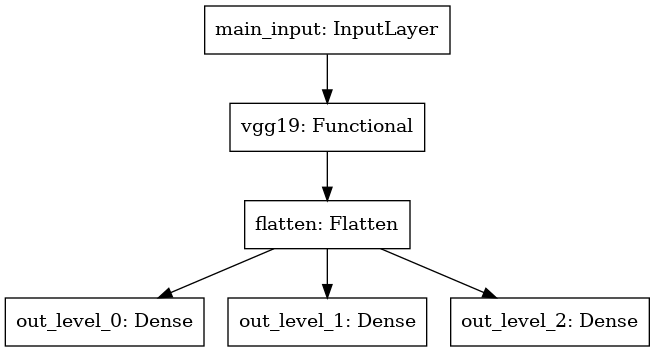

In [3]:
# Create the model
mout_model = models.get_mout_model(num_classes, dataset.image_size)
mout_model.summary()
#train model
history_mout_model = mout_model.fit(dataset.X_train, 
                    dataset.y_train,
                    validation_data = (dataset.X_val, dataset.y_val), 
                    batch_size=batch, 
                    epochs=epochs,
                    callbacks=[performance_callback, early_stopping_callback]
                    )
plot_model(mout_model)


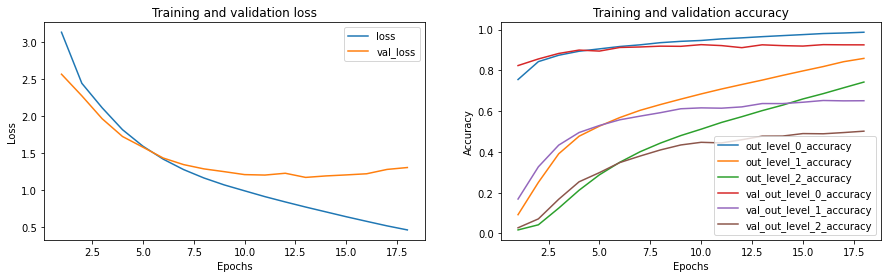

In [6]:
plt.figure(figsize=(15,4))
ax1 = plt.subplot(1, 2, 1)
for l in history_mout_model.history:
    if l == 'loss' or l == 'val_loss':  
        loss = history_mout_model.history[l]
        plt.plot(range(1, len(loss) + 1), loss, label=l)
        
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

ax2 = plt.subplot(1, 2, 2)
for k in history_mout_model.history:
    if 'accuracy' in k:  
        loss = history_mout_model.history[k]
        plt.plot(range(1, len(loss) + 1), loss, label=k)
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Model: "Model_BCNN1_reversed_False"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      [(None, 32, 32, 3)]       0         
_________________________________________________________________
vgg19 (Functional)           (None, None, None, 512)   20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
out_level_0 (Dense)          (None, 2)                 1026      
_________________________________________________________________
out_level_1 (Dense)          (None, 20)                60        
_________________________________________________________________
out_level_2 (Dense)          (None, 100)               2100      
Total params: 20,027,570
Trainable params: 20,027,570
Non-trainable params: 0
____________________________

391/391 [==============================] - 13s 33ms/step - loss: 2.5664 - out_level_0_loss: 0.0826 - out_level_1_loss: 3.0115 - out_level_2_loss: 4.6052 - out_level_0_accuracy: 0.9691 - out_level_1_accuracy: 0.0988 - out_level_2_accuracy: 0.0096 - val_loss: 2.6290 - val_out_level_0_loss: 0.2680 - val_out_level_1_loss: 3.0140 - val_out_level_2_loss: 4.6050 - val_out_level_0_accuracy: 0.9130 - val_out_level_1_accuracy: 0.0916 - val_out_level_2_accuracy: 0.0098
----------------------------------------------------------------------------------------------------
epoch=10, Exact Match = 0.0000, accuracy level_0 = 0.9130, accuracy level_1 = 0.0916, accuracy level_2 = 0.0098, Consistency = 0.0000
----------------------------------------------------------------------------------------------------

Epoch 11/50
391/391 [==============================] - 13s 33ms/step - loss: 2.5595 - out_level_0_loss: 0.0643 - out_level_1_loss: 3.0091 - out_level_2_loss: 4.6050 - out_level_0_accuracy: 0.9767 - ou

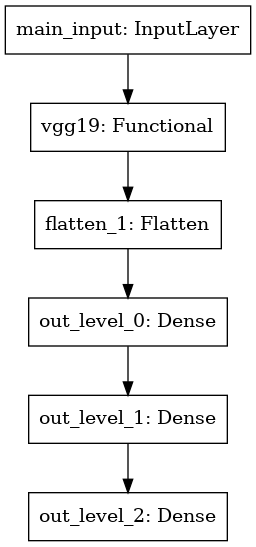

In [7]:
# Create the model
BCNN1_model = models.get_BCNN1(num_classes, dataset.image_size)
BCNN1_model.summary()
#train model
history_BCNN1_model = BCNN1_model.fit(dataset.X_train, 
                    dataset.y_train,
                    validation_data = (dataset.X_val, dataset.y_val), 
                    batch_size=batch, 
                    epochs=epochs,
                    callbacks=[performance_callback, early_stopping_callback]
                    )
plot_model(BCNN1_model)


Model: "Model_BCNN1_reversed_True"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      [(None, 32, 32, 3)]       0         
_________________________________________________________________
vgg19 (Functional)           (None, None, None, 512)   20024384  
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
out_level_2 (Dense)          (None, 100)               51300     
_________________________________________________________________
out_level_1 (Dense)          (None, 20)                2020      
_________________________________________________________________
out_level_0 (Dense)          (None, 2)                 42        
Total params: 20,077,746
Trainable params: 20,077,746
Non-trainable params: 0
_____________________________

391/391 [==============================] - 13s 33ms/step - loss: 1.5434 - out_level_0_loss: 0.6674 - out_level_1_loss: 2.9416 - out_level_2_loss: 1.0213 - out_level_0_accuracy: 0.6500 - out_level_1_accuracy: 0.1959 - out_level_2_accuracy: 0.7160 - val_loss: 1.9107 - val_out_level_0_loss: 0.6673 - val_out_level_1_loss: 2.9496 - val_out_level_2_loss: 2.1154 - val_out_level_0_accuracy: 0.6480 - val_out_level_1_accuracy: 0.1728 - val_out_level_2_accuracy: 0.5046
----------------------------------------------------------------------------------------------------
epoch=10, Exact Match = 0.0456, accuracy level_0 = 0.6480, accuracy level_1 = 0.1728, accuracy level_2 = 0.5046, Consistency = 0.1088
----------------------------------------------------------------------------------------------------

Epoch 11/50
391/391 [==============================] - 13s 33ms/step - loss: 1.4918 - out_level_0_loss: 0.6661 - out_level_1_loss: 2.9356 - out_level_2_loss: 0.8738 - out_level_0_accuracy: 0.6500 - ou

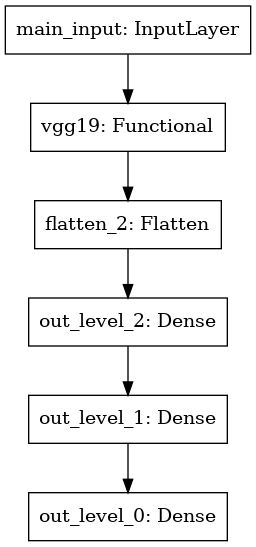

In [8]:
# Create the model
BCNN1_reversed_model = models.get_BCNN1(num_classes, dataset.image_size, reverse=True)
BCNN1_reversed_model.summary()
#train model
history_BCNN1_reversed_model = BCNN1_reversed_model.fit(dataset.X_train, 
                    dataset.y_train,
                    validation_data = (dataset.X_val, dataset.y_val), 
                    batch_size=batch, 
                    epochs=epochs,
                    callbacks=[performance_callback, early_stopping_callback]
                    )
plot_model(BCNN1_reversed_model)

Model: "Model_BCNN2_reversed_False"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
vgg19 (Functional)              (None, None, None, 5 20024384    main_input[0][0]                 
__________________________________________________________________________________________________
flatten_3 (Flatten)             (None, 512)          0           vgg19[0][0]                      
__________________________________________________________________________________________________
logits_level_0 (Dense)          (None, 2)            1026        flatten_3[0][0]                  
_________________________________________________________________________

2021-07-21 19:39:14.468192: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /tmp/checkpoint_new/assets
Epoch 2/50
391/391 [==============================] - 13s 33ms/step - loss: 2.6763 - out_level_0_loss: 0.4430 - out_level_1_loss: 2.9611 - out_level_2_loss: 4.6249 - out_level_0_accuracy: 0.8282 - out_level_1_accuracy: 0.0735 - out_level_2_accuracy: 0.0085 - val_loss: 2.6671 - val_out_level_0_loss: 0.4205 - val_out_level_1_loss: 2.9480 - val_out_level_2_loss: 4.6329 - val_out_level_0_accuracy: 0.8384 - val_out_level_1_accuracy: 0.0776 - val_out_level_2_accuracy: 0.0090
----------------------------------------------------------------------------------------------------
epoch=2, Exact Match = 0.0000, accuracy level_0 = 0.8384, accuracy level_1 = 0.0776, accuracy level_2 = 0.0090, Consistency = 0.0000
----------------------------------------------------------------------------------------------------

INFO:tensorflow:Assets written to: /tmp/checkpoint_new/assets
Epoch 3/50
391/391 [==============================] - 13s 33ms/ste

----------------------------------------------------------------------------------------------------
epoch=11, Exact Match = 0.0000, accuracy level_0 = 0.8994, accuracy level_1 = 0.1184, accuracy level_2 = 0.0152, Consistency = 0.0008
----------------------------------------------------------------------------------------------------

INFO:tensorflow:Assets written to: /tmp/checkpoint_new/assets
Epoch 12/50
391/391 [==============================] - 13s 34ms/step - loss: 2.4361 - out_level_0_loss: 0.2560 - out_level_1_loss: 2.6872 - out_level_2_loss: 4.3652 - out_level_0_accuracy: 0.9362 - out_level_1_accuracy: 0.1316 - out_level_2_accuracy: 0.0189 - val_loss: 2.5126 - val_out_level_0_loss: 0.3078 - val_out_level_1_loss: 2.7975 - val_out_level_2_loss: 4.4326 - val_out_level_0_accuracy: 0.9040 - val_out_level_1_accuracy: 0.1242 - val_out_level_2_accuracy: 0.0182
----------------------------------------------------------------------------------------------------
epoch=12, Exact Match = 0

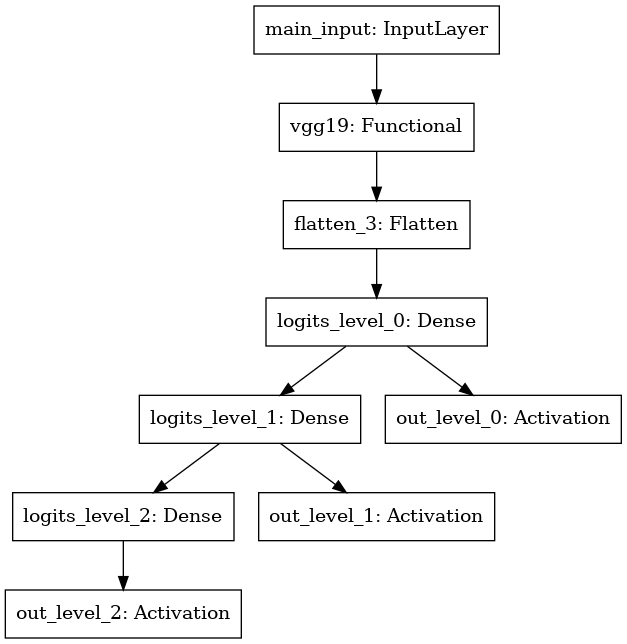

In [9]:
# Create the model
BCNN2_model = models.get_BCNN2(num_classes, dataset.image_size)
BCNN2_model.summary()
#train model
history_BCNN2_model = BCNN2_model.fit(dataset.X_train, 
                    dataset.y_train,
                    validation_data = (dataset.X_val, dataset.y_val), 
                    batch_size=batch, 
                    epochs=epochs,
                    callbacks=[performance_callback, early_stopping_callback]
                    )
plot_model(BCNN2_model)

Model: "Model_BCNN2_reversed_True"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
vgg19 (Functional)              (None, None, None, 5 20024384    main_input[0][0]                 
__________________________________________________________________________________________________
flatten_4 (Flatten)             (None, 512)          0           vgg19[1][0]                      
__________________________________________________________________________________________________
logits_level_2 (Dense)          (None, 100)          51300       flatten_4[0][0]                  
__________________________________________________________________________

391/391 [==============================] - 13s 33ms/step - loss: 0.6558 - out_level_0_loss: 0.0404 - out_level_1_loss: 0.5459 - out_level_2_loss: 1.3810 - out_level_0_accuracy: 0.9863 - out_level_1_accuracy: 0.8245 - out_level_2_accuracy: 0.6238 - val_loss: 1.5129 - val_out_level_0_loss: 0.3456 - val_out_level_1_loss: 1.6986 - val_out_level_2_loss: 2.4945 - val_out_level_0_accuracy: 0.9240 - val_out_level_1_accuracy: 0.6228 - val_out_level_2_accuracy: 0.4490
----------------------------------------------------------------------------------------------------
epoch=8, Exact Match = 0.4036, accuracy level_0 = 0.9240, accuracy level_1 = 0.6228, accuracy level_2 = 0.4490, Consistency = 0.7432
----------------------------------------------------------------------------------------------------

Epoch 9/50
391/391 [==============================] - 13s 33ms/step - loss: 0.5607 - out_level_0_loss: 0.0310 - out_level_1_loss: 0.4530 - out_level_2_loss: 1.1980 - out_level_0_accuracy: 0.9896 - out_

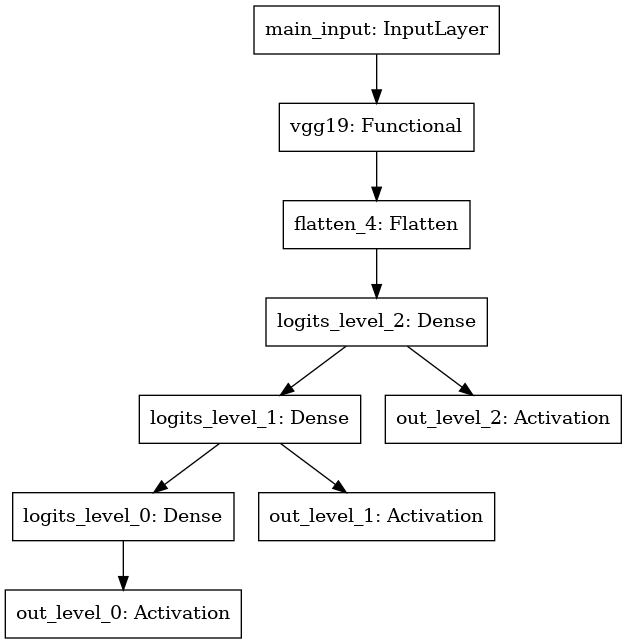

In [10]:
# Create the model
BCNN2_reversed_model = models.get_BCNN2(num_classes, dataset.image_size, reverse=True)
BCNN2_reversed_model.summary()
#train model
history_BCNN2_reversed_model = BCNN2_reversed_model.fit(dataset.X_train, 
                    dataset.y_train,
                    validation_data = (dataset.X_val, dataset.y_val), 
                    batch_size=batch, 
                    epochs=epochs,
                    callbacks=[performance_callback, early_stopping_callback]
                    )
plot_model(BCNN2_reversed_model)


Model: "mnets"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv_base0 (Functional)         (None, None, None, 5 20024384    main_input[0][0]                 
__________________________________________________________________________________________________
conv_base1 (Functional)         (None, None, None, 5 20024384    main_input[0][0]                 
__________________________________________________________________________________________________
conv_base2 (Functional)         (None, None, None, 5 20024384    main_input[0][0]                 
______________________________________________________________________________________________

INFO:tensorflow:Assets written to: /tmp/checkpoint_new/assets
Epoch 8/50
391/391 [==============================] - 34s 86ms/step - loss: 1.0802 - out_level_0_loss: 0.1134 - out_level_1_loss: 0.9903 - out_level_2_loss: 2.1368 - out_level_0_accuracy: 0.9562 - out_level_1_accuracy: 0.6812 - out_level_2_accuracy: 0.4636 - val_loss: 1.2896 - val_out_level_0_loss: 0.2726 - val_out_level_1_loss: 1.2566 - val_out_level_2_loss: 2.3396 - val_out_level_0_accuracy: 0.9094 - val_out_level_1_accuracy: 0.6114 - val_out_level_2_accuracy: 0.4196
----------------------------------------------------------------------------------------------------
epoch=8, Exact Match = 0.3440, accuracy level_0 = 0.9094, accuracy level_1 = 0.6114, accuracy level_2 = 0.4196, Consistency = 0.5888
----------------------------------------------------------------------------------------------------

INFO:tensorflow:Assets written to: /tmp/checkpoint_new/assets
Epoch 9/50
391/391 [==============================] - 34s 86ms/ste

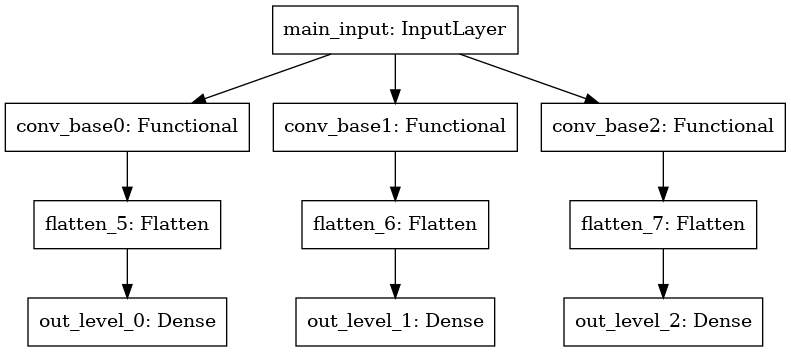

In [11]:
# Create the model
mnets_model = models.get_mnets(num_classes, dataset.image_size, reverse=True)
mnets_model.summary()
#train model
history_mnets_model = mnets_model.fit(dataset.X_train, 
                    dataset.y_train,
                    validation_data = (dataset.X_val, dataset.y_val), 
                    batch_size=batch, 
                    epochs=epochs,
                    callbacks=[performance_callback, early_stopping_callback]
                    )
plot_model(mnets_model)


Model: "baseline_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      [(None, 32, 32, 3)]       0         
_________________________________________________________________
vgg19 (Functional)           (None, None, None, 512)   20024384  
_________________________________________________________________
flatten_8 (Flatten)          (None, 512)               0         
_________________________________________________________________
output (Dense)               (None, 100)               51300     
Total params: 20,075,684
Trainable params: 20,075,684
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
391/391 [==============================] - 14s 33ms/step - loss: 5.2311 - accuracy: 0.0221 - val_loss: 4.4360 - val_accuracy: 0.0412
----------------------------------------------------------------------------------------------

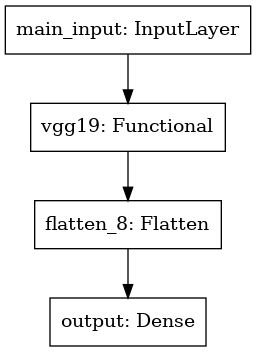

In [12]:
# Create the model
baseline_model = models.get_Baseline_model(num_classes, dataset.image_size, dataset.taxonomy)
baseline_model.summary()
#train model
history_baseline_model = baseline_model.fit(dataset.X_train, 
                    dataset.y_train[-1],
                    validation_data = (dataset.X_val, dataset.y_val[-1]),
                    batch_size=batch, 
                    epochs=epochs,
                    callbacks=[performance_callback, early_stopping_callback]
                    )
plot_model(baseline_model)


Model: "MLPH_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
model_1 (Functional)            [(None, None, None,  17664576    main_input[0][0]                 
__________________________________________________________________________________________________
flatten_12 (Flatten)            (None, 2048)         0           model_1[0][0]                    
__________________________________________________________________________________________________
flatten_13 (Flatten)            (None, 2048)         0           model_1[0][1]                    
_________________________________________________________________________________________

----------------------------------------------------------------------------------------------------
epoch=5, Exact Match = 0.0006, accuracy level_0 = 0.6108, accuracy level_1 = 0.0684, accuracy level_2 = 0.0194, Consistency = 0.0322
----------------------------------------------------------------------------------------------------

Epoch 6/50
391/391 [==============================] - 13s 33ms/step - loss: 9.1846 - out_level_0_loss: 2.4863 - out_level_1_loss: 10.5719 - out_level_2_loss: 14.4958 - out_level_0_accuracy: 0.6245 - out_level_1_accuracy: 0.0722 - out_level_2_accuracy: 0.0162 - val_loss: 6.8952 - val_out_level_0_loss: 2.0577 - val_out_level_1_loss: 7.6402 - val_out_level_2_loss: 10.9877 - val_out_level_0_accuracy: 0.6426 - val_out_level_1_accuracy: 0.0700 - val_out_level_2_accuracy: 0.0182
----------------------------------------------------------------------------------------------------
epoch=6, Exact Match = 0.0010, accuracy level_0 = 0.6426, accuracy level_1 = 0.0700, a

391/391 [==============================] - 13s 33ms/step - loss: 2.6841 - out_level_0_loss: 0.5361 - out_level_1_loss: 2.8716 - out_level_2_loss: 4.6446 - out_level_0_accuracy: 0.7526 - out_level_1_accuracy: 0.1527 - out_level_2_accuracy: 0.0283 - val_loss: 2.6794 - val_out_level_0_loss: 0.5850 - val_out_level_1_loss: 2.8548 - val_out_level_2_loss: 4.5985 - val_out_level_0_accuracy: 0.7582 - val_out_level_1_accuracy: 0.1518 - val_out_level_2_accuracy: 0.0318
----------------------------------------------------------------------------------------------------
epoch=16, Exact Match = 0.0088, accuracy level_0 = 0.7582, accuracy level_1 = 0.1518, accuracy level_2 = 0.0318, Consistency = 0.0934
----------------------------------------------------------------------------------------------------

Epoch 17/50
391/391 [==============================] - 13s 33ms/step - loss: 2.6405 - out_level_0_loss: 0.5232 - out_level_1_loss: 2.8092 - out_level_2_loss: 4.5891 - out_level_0_accuracy: 0.7600 - ou

391/391 [==============================] - 13s 32ms/step - loss: 1.8674 - out_level_0_loss: 0.3540 - out_level_1_loss: 1.9679 - out_level_2_loss: 3.2802 - out_level_0_accuracy: 0.8555 - out_level_1_accuracy: 0.3886 - out_level_2_accuracy: 0.2078 - val_loss: 1.9383 - val_out_level_0_loss: 0.4296 - val_out_level_1_loss: 2.0313 - val_out_level_2_loss: 3.3541 - val_out_level_0_accuracy: 0.8288 - val_out_level_1_accuracy: 0.3828 - val_out_level_2_accuracy: 0.1992
----------------------------------------------------------------------------------------------------
epoch=36, Exact Match = 0.1360, accuracy level_0 = 0.8286, accuracy level_1 = 0.3828, accuracy level_2 = 0.1992, Consistency = 0.4222
----------------------------------------------------------------------------------------------------

Epoch 37/50
391/391 [==============================] - 13s 32ms/step - loss: 1.8334 - out_level_0_loss: 0.3474 - out_level_1_loss: 1.9301 - out_level_2_loss: 3.2225 - out_level_0_accuracy: 0.8588 - ou

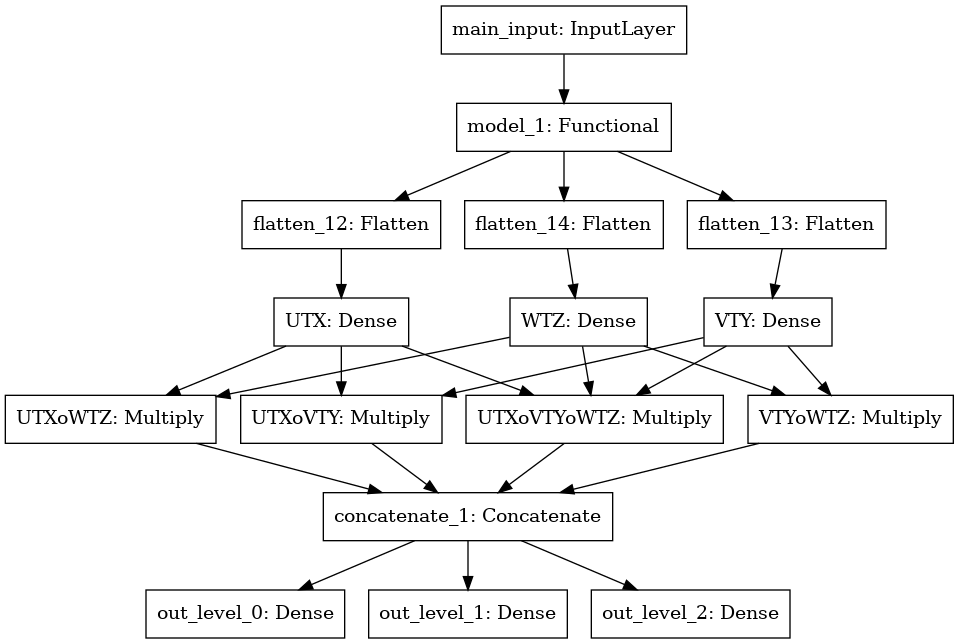

In [17]:
# Create the model
MLPH_model = models.get_MLPH_model(num_classes, dataset.image_size)
MLPH_model.summary()
#train model
history_MLPH_model = MLPH_model.fit(dataset.X_train, 
                    dataset.y_train,
                    validation_data = (dataset.X_val, dataset.y_val), 
                    batch_size=batch, 
                    epochs=epochs,
                    callbacks=[performance_callback, early_stopping_callback]
                    )
plot_model(MLPH_model,show_shapes=False, expand_nested=False, dpi=96)



In [18]:
mout_pred = mout_model.predict(dataset.X_test)
mout_pred = models.get_pred_indexes(mout_pred)

BCNN1_pred = BCNN1_model.predict(dataset.X_test)
BCNN1_pred = models.get_pred_indexes(BCNN1_pred)

BCNN1_reversed_pred = BCNN1_reversed_model.predict(dataset.X_test)
BCNN1_reversed_pred = models.get_pred_indexes(BCNN1_reversed_pred)

BCNN2_pred = BCNN2_model.predict(dataset.X_test)
BCNN2_pred = models.get_pred_indexes(BCNN2_pred)

BCNN2_reversed_pred = BCNN2_reversed_model.predict(dataset.X_test)
BCNN2_reversed_pred = models.get_pred_indexes(BCNN2_reversed_pred)

mnets_model_pred = mnets_model.predict(dataset.X_test)
mnets_model_pred = models.get_pred_indexes(mnets_model_pred)

baseline_model_pred = baseline_model.predict(dataset.X_test)
baseline_model_pred = models.get_pred_indexes(baseline_model_pred)

MLPH_pred = MLPH_model.predict(dataset.X_test)
MLPH_pred = models.get_pred_indexes(MLPH_pred)


In [19]:
exact_match_scores = [metrics.get_exact_match(mout_pred, dataset.y_test),
     metrics.get_exact_match(BCNN1_pred, dataset.y_test),
     metrics.get_exact_match(BCNN1_reversed_pred, dataset.y_test),
     metrics.get_exact_match(BCNN2_pred, dataset.y_test),
     metrics.get_exact_match(BCNN2_reversed_pred, dataset.y_test),
     metrics.get_exact_match(mnets_model_pred, dataset.y_test),
     metrics.get_exact_match(baseline_model_pred, dataset.y_test),
                      metrics.get_exact_match(MLPH_pred, dataset.y_test)]

h_accuracy_scores = [metrics.get_h_accuracy(mout_pred, dataset.y_test),
     metrics.get_h_accuracy(BCNN1_pred, dataset.y_test),
     metrics.get_h_accuracy(BCNN1_reversed_pred, dataset.y_test),
     metrics.get_h_accuracy(BCNN2_pred, dataset.y_test),
     metrics.get_h_accuracy(BCNN2_reversed_pred, dataset.y_test),
     metrics.get_h_accuracy(mnets_model_pred, dataset.y_test),
     metrics.get_h_accuracy(baseline_model_pred, dataset.y_test), 
    metrics.get_h_accuracy(MLPH_pred, dataset.y_test)]

m_accuracy_scores = [metrics.get_m_accuracy(mout_pred, dataset.y_test),
     metrics.get_m_accuracy(BCNN1_pred, dataset.y_test),
     metrics.get_m_accuracy(BCNN1_reversed_pred, dataset.y_test),
     metrics.get_m_accuracy(BCNN2_pred, dataset.y_test),
     metrics.get_m_accuracy(BCNN2_reversed_pred, dataset.y_test),
     metrics.get_m_accuracy(mnets_model_pred, dataset.y_test),
     metrics.get_m_accuracy(baseline_model_pred, dataset.y_test),
                    metrics.get_m_accuracy(MLPH_pred, dataset.y_test)]


consistency = [metrics.get_consistency(mout_pred, dataset.taxonomy),
     metrics.get_consistency(BCNN1_pred, dataset.taxonomy),
     metrics.get_consistency(BCNN1_reversed_pred, dataset.taxonomy),
     metrics.get_consistency(BCNN2_pred, dataset.taxonomy),
     metrics.get_consistency(BCNN2_reversed_pred, dataset.taxonomy),
     metrics.get_consistency(mnets_model_pred, dataset.taxonomy),
     metrics.get_consistency(baseline_model_pred, dataset.taxonomy),
              metrics.get_consistency(MLPH_pred, dataset.taxonomy)]

# Create example dataframe
df = pd.DataFrame({
'exact_match': exact_match_scores,
'h_accuracy': h_accuracy_scores,
'm_accuracy': m_accuracy_scores,
'consistency': consistency,
's': [3000,3000,3000,3000,3000,3000,3000,3000],
'algo': ['mout','BCNN1','BCNN1_R','BCNN2','BCNN2_R', 'mnets', 'baseline', 'MLPH']
})


/home/reda/PycharmProjects/Masked-CNN/python3.8_mcnn/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


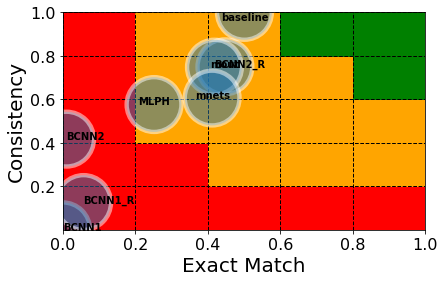

In [21]:
plt.figure(figsize=(6.5, 4))
params = {'legend.fontsize': 18,
          'axes.labelsize': 20,
          'axes.titlesize': 14,
          'xtick.labelsize': 16,
          'ytick.labelsize': 16,
          'axes.titlepad': 25,
          'font.size': 10}
plt.rcParams.update(params)

ax = sns.scatterplot(df.exact_match, df.consistency, alpha = 0.5,s = df.s)

ax.grid(color='black', linestyle='--', linewidth=1)
ax.set_axisbelow(True)

plt.xlabel("")
plt.ylabel("consistency")
# plt.title("Box plot of #candidates per cycle and system")
plt.yticks([0.2,0.4,0.6,0.8,1.0])
plt.xticks([0.0,0.2,0.4,0.6,0.8,1.0])

ax.set_xlim(0,1)
ax.set_ylim(0, 1)
plt.xlabel('Exact Match')
plt.ylabel('Consistency')
#For each point, we add a text inside the bubble
for line in range(0,df.shape[0]):
    if df.algo[line]=='baseline':
        ax.text(df.exact_match[line], df.consistency[line], df.algo[line], verticalalignment='top', horizontalalignment='center', size='medium', color='black', weight='semibold')
    elif df.algo[line].startswith('BCNN'):
        ax.text(df.exact_match[line], df.consistency[line], df.algo[line], horizontalalignment='left', size='medium', color='black', weight='semibold')
    else:
        ax.text(df.exact_match[line], df.consistency[line], df.algo[line], horizontalalignment='center', size='medium', color='black', weight='semibold')



currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((0., 0.), 1., 0.2, color = 'red', zorder=0))
currentAxis.add_patch(Rectangle((0., 0.), .2, 1., color = 'red',zorder=0))
currentAxis.add_patch(Rectangle((0.2, 0.2), 0.2, 0.2, color = 'red', zorder=0))

currentAxis.add_patch(Rectangle((0.2, 0.4), 0.4, 1.0, color = 'orange', zorder=0))
currentAxis.add_patch(Rectangle((0.4, 0.2), 1., 0.4, color = 'orange', zorder=0))
currentAxis.add_patch(Rectangle((0.6, 0.6), 0.2, 0.2, color = 'orange', zorder=0))

currentAxis.add_patch(Rectangle((0.8, 0.6), 0.2, 0.4, color = 'green', zorder=0))
currentAxis.add_patch(Rectangle((0.6, 0.8), 0.4, 0.2, color = 'green', zorder=0))
# plotlim = plt.xlim() + plt.ylim()
# import matplotlib.colors

# cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

# ax.imshow([[0.5, 0.5, 0.5], [0, 0.5, 0.5], [0, 0, 0.5]],
#           cmap=cmap,
#           interpolation='bicubic',
#           extent=plotlim, vmin=0, vmax=0.5)
        
plt.savefig('plots/bubble_plot.pdf', bbox_inches = 'tight')
plt.show()


In [ ]:
class Custom_Layer(keras.layers.Layer):
    def __init__(self, M, mode='both'):
        super(Custom_Layer, self).__init__()
        self.M = M
        if mode in ['both', 'c_to_f', 'f_to_c']:
          self.mode = mode

    def build(self, input_shape):
        """Creates scale variable if use_scale==True."""
        if isinstance(input_shape, list):
          input_dim1 = input_shape[0][1]
          input_dim2 = input_shape[0][1]
        else:
          input_dim1 = input_shape[1]
          input_dim2 = input_shape[1]
        
        units_c = len(self.M)
        units_f = len(self.M[0])
        self.M = tf.convert_to_tensor(self.M, dtype=tf.float32)

        self.W_c = self.add_weight(
            shape=(input_dim1, units_c), initializer="random_normal", trainable=True
        )
        self.b_c = self.add_weight(shape=(units_c,), initializer="zeros", trainable=True)
        self.W_f = self.add_weight(
            shape=(input_dim2, units_f), initializer="random_normal", trainable=True
        )
        self.b_f = self.add_weight(shape=(units_f,), initializer="zeros", trainable=True)

    def call(self, inputs):
      # Code the six equation
      if isinstance(inputs, list):
        inputs1 = inputs[0]
        inputs2 = inputs[1]
      else:
        inputs1 = inputs
        inputs2 = inputs
      
      z_c = tf.matmul(inputs1, self.W_c) + self.b_c # z^{(i)}_{c}= a^{[l]} \times W_{c} + b_{c}
      z_f = tf.matmul(inputs2, self.W_f) + self.b_f #  z^{(i)}_{f}= a^{[l]} \times  W_{f}+ b_{f}
      if self.mode == 'both' or self.mode == 'f_to_c':
        m_c = tf.matmul(tf.nn.softmax(z_f), tf.transpose(self.M)) # m^{(i)}_{c}= softmax(z^{(i)}_{f})\times M^{T}            
        y_c = tf.nn.softmax(z_c * m_c) # \hat{y}^{(i)}_{c}= softmax(z^{(i)}_{c}\circ m^{(i)}_{c})
      else:
        y_c = tf.nn.softmax(z_c)

      if self.mode == 'both' or self.mode == 'c_to_f':
        m_f = tf.matmul(tf.nn.softmax(z_c), self.M) #  m^{(i)}_{f}= softmax(z^{(i)}_{c})\times M
        y_f = tf.nn.softmax(z_f * m_f) # \hat{y}^{(i)}_{f}= softmax(z^{(i)}_{f}\circ m^{(i)}_{f})
      else:
        y_f = tf.nn.softmax(z_f)

      return y_c, y_f

    def get_config(self):
        config = {'M': self.M, 
                  'W_c': self.W_c,
                  'W_f': self.W_f,
                  'b_f': self.b_f,
                  'b_f': self.b_f}
        base_config = super(Custom_Layer, self).get_config()
        return base_config
    
    @classmethod
    def from_config(cls, config):
        return cls(**config)

In [ ]:
def get_model7(learning_rate=1e-5, pi=0.5, mode='both'):
    # Conv base
    in_layer = Input(shape=dataset.image_size, name='main_input')
    conv_base = keras.applications.VGG19(
        include_top=False,
        weights="imagenet")(in_layer)
    conv_base = Flatten()(conv_base)
    # outputs 
    out_c, out_f = Custom_Layer(M, mode)(conv_base)
    # Build the model
    model = Model(name='Model_7',
            inputs=in_layer,
            outputs=[out_c, out_f])
    loss = keras.losses.SparseCategoricalCrossentropy()
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, 
                  loss=[loss, loss],
                  loss_weights=[1-pi, pi],
                  metrics=['accuracy'])
    return model

model = get_model7()
model.summary()
plot_model(model)


In [ ]:
def get_model8(learning_rate=1e-5, pi=0.5, mode='both'):
    # Conv base
    conv_base1 = keras.applications.VGG19(
    include_top=False,
    weights="imagenet")
    conv_base1._name = 'vgg19_1'
    conv_base2 = keras.applications.VGG19(
        include_top=False,
        weights="imagenet")
    conv_base2._name = 'vgg19_2'
    in_layer = Input(shape=image_size, name='main_input')
    conv_base1 = conv_base1(in_layer)    
    conv_base1 = Flatten()(conv_base1)

    conv_base2 = conv_base2(in_layer)
    conv_base2 = Flatten()(conv_base2)

    out_c, out_f = Custom_Layer(M, mode)([conv_base1, conv_base2])
    # Build the model
    model = Model(name='Model_8',
            inputs=in_layer,
            outputs=[out_c, out_f])
    loss = keras.losses.SparseCategoricalCrossentropy()
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, 
                  loss=[loss, loss],
                  loss_weights=[1-pi, pi],
                  metrics=['accuracy'])
    return model

# model = get_model8()
# model.summary()
# plot_model(model)

In [ ]:
data = pd.DataFrame(columns=['algo','accuracy'])
data_list = list(zip(['Coarse-grained\n classifier']*len(accuracy_c), accuracy_c))
data = data.append(pd.DataFrame(data_list, columns=['algo','accuracy']),ignore_index=True)

data_list = list(zip(['Fine-grained\n classifier']*len(accuracy_f), accuracy_f))
data = data.append(pd.DataFrame(data_list, columns=['algo','accuracy']),ignore_index=True)

plt.figure(figsize=(5.5, 3.8))
params = {'legend.fontsize': 18,
          'axes.labelsize': 20,
          'axes.titlesize': 14,
          'xtick.labelsize': 20,
          'ytick.labelsize': 18,
          'axes.titlepad': 25,
          'font.size': 24}
plt.rcParams.update(params)

ax = sns.barplot(x="algo", y="accuracy", data=data, ci=95, capsize=.2)
# ax.text(.5,.87,f"p-value = {pvalue:.4f} ≮ 0.05",
#         horizontalalignment='center',
#         transform=ax.transAxes,
#        bbox=dict(facecolor='white', edgecolor='none'))
ax.grid(color='black', linestyle='--', linewidth=1)
ax.set_axisbelow(True)

plt.xlabel("")
plt.ylabel("% correct predictions")
# plt.title("Box plot of #candidates per cycle and system")

plt.ylim(0, 100)
plt.xticks(rotation=0)
# plt.savefig('plots/em_SQuAD2.0.eps', bbox_inches = 'tight')
plt.show()

In [ ]:
data = pd.DataFrame(columns=['algo','consistency'])

data_list = list(zip(['XXX']*len(consistency), consistency))
data = data.append(pd.DataFrame(data_list, columns=['algo','consistency']),ignore_index=True)

plt.figure(figsize=(2, 3.8))
params = {'legend.fontsize': 18,
          'axes.labelsize': 20,
          'axes.titlesize': 14,
          'xtick.labelsize': 20,
          'ytick.labelsize': 18,
          'axes.titlepad': 25,
          'font.size': 24}
plt.rcParams.update(params)
ax = sns.barplot(x="algo", y="consistency", data=data, ci=95, capsize=.2)
# ax.text(.5,.87,f"p-value = {pvalue:.4f} ≮ 0.05",
#         horizontalalignment='center',
#         transform=ax.transAxes,
#        bbox=dict(facecolor='white', edgecolor='none'))
ax.grid(color='black', linestyle='--', linewidth=1)
ax.set_axisbelow(True)

plt.xlabel("")
plt.ylabel("% inconsistent preds")
# plt.title("Box plot of #candidates per cycle and system")

plt.ylim(0, 100)
plt.xticks(rotation=0)
# plt.savefig('plots/em_SQuAD2.0.eps', bbox_inches = 'tight')
plt.show()

In [ ]:
data = pd.DataFrame(columns=['algo','consistency2'])

data_list = list(zip(['XXX']*len(consistency2), consistency2))
data = data.append(pd.DataFrame(data_list, columns=['algo','consistency2']),ignore_index=True)

plt.figure(figsize=(2, 3.8))
params = {'legend.fontsize': 18,
          'axes.labelsize': 20,
          'axes.titlesize': 14,
          'xtick.labelsize': 20,
          'ytick.labelsize': 18,
          'axes.titlepad': 25,
          'font.size': 24}
plt.rcParams.update(params)
ax = sns.barplot(x="algo", y="consistency2", data=data, ci=95, capsize=.2)
# ax.text(.5,.87,f"p-value = {pvalue:.4f} ≮ 0.05",
#         horizontalalignment='center',
#         transform=ax.transAxes,
#        bbox=dict(facecolor='white', edgecolor='none'))
ax.grid(color='black', linestyle='--', linewidth=1)
ax.set_axisbelow(True)

plt.xlabel("")
plt.ylabel("% inconsistent preds")
# plt.title("Box plot of #candidates per cycle and system")
plt.ylim(0, 100)
plt.xticks(rotation=0)
# plt.savefig('plots/em_SQuAD2.0.eps', bbox_inches = 'tight')
plt.show()

In [ ]:
data = pd.DataFrame(columns=['algo','consistency3'])

data_list = list(zip(['XXX']*len(consistency3), consistency3))
data = data.append(pd.DataFrame(data_list, columns=['algo','consistency3']),ignore_index=True)

plt.figure(figsize=(2, 3.8))
params = {'legend.fontsize': 18,
          'axes.labelsize': 20,
          'axes.titlesize': 14,
          'xtick.labelsize': 20,
          'ytick.labelsize': 18,
          'axes.titlepad': 25,
          'font.size': 24}
plt.rcParams.update(params)
ax = sns.barplot(x="algo", y="consistency3", data=data, ci=95, capsize=.2)
# ax.text(.5,.87,f"p-value = {pvalue:.4f} ≮ 0.05",
#         horizontalalignment='center',
#         transform=ax.transAxes,
#        bbox=dict(facecolor='white', edgecolor='none'))
ax.grid(color='black', linestyle='--', linewidth=1)
ax.set_axisbelow(True)

plt.xlabel("")
plt.ylabel("% inconsistent preds")
# plt.title("Box plot of #candidates per cycle and system")
plt.ylim(0, 100)
plt.xticks(rotation=0)
# plt.savefig('plots/em_SQuAD2.0.eps', bbox_inches = 'tight')
plt.show()

In [ ]:
data = pd.DataFrame(columns=['algo','accuracy','accuracy_c', 'accuracy_f', 'accuracy_consistency', 'consistency'])

# accuracy, accuracy_c, accuracy_f, accuracy_c_no_f, accuracy_f_no_c, accuracy_no_f_no_c, accuracy_consistency, consistency = get_metrics(model1_pi1, X_test, y_test)
# data_list = list(zip(['model1_pi1']*len(accuracy), accuracy, accuracy_c, accuracy_f, accuracy_consistency, consistency))
# data = data.append(pd.DataFrame(data_list, columns=['algo','accuracy','accuracy_c', 'accuracy_f', 'accuracy_consistency', 'consistency']),ignore_index=True)

# accuracy, accuracy_c, accuracy_f, accuracy_c_no_f, accuracy_f_no_c, accuracy_no_f_no_c, accuracy_consistency, consistency = get_metrics(model1_pi0, X_test, y_test)
# data_list = list(zip(['model1_pi0']*len(accuracy), accuracy, accuracy_c, accuracy_f, accuracy_consistency, consistency))
# data = data.append(pd.DataFrame(data_list, columns=['algo','accuracy','accuracy_c', 'accuracy_f', 'accuracy_consistency', 'consistency']),ignore_index=True)

accuracy, accuracy_c, accuracy_f, accuracy_c_no_f, accuracy_f_no_c, accuracy_no_f_no_c, accuracy_consistency, consistency = get_metrics(model1_pi0_5, X_test, y_test)
data_list = list(zip(['model1_pi0.5']*len(accuracy), accuracy, accuracy_c, accuracy_f, accuracy_consistency, consistency))
data = data.append(pd.DataFrame(data_list, columns=['algo','accuracy','accuracy_c', 'accuracy_f', 'accuracy_consistency', 'consistency']),ignore_index=True)

# accuracy, accuracy_c, accuracy_f, accuracy_c_no_f, accuracy_f_no_c, accuracy_no_f_no_c, accuracy_consistency, consistency = get_metrics(model2, X_test, y_test)
# data_list = list(zip(['model2']*len(accuracy), accuracy, accuracy_c, accuracy_f, accuracy_consistency, consistency))
# data = data.append(pd.DataFrame(data_list, columns=['algo','accuracy','accuracy_c', 'accuracy_f', 'accuracy_consistency', 'consistency']),ignore_index=True)

# accuracy, accuracy_c, accuracy_f, accuracy_c_no_f, accuracy_f_no_c, accuracy_no_f_no_c, accuracy_consistency, consistency = get_metrics(model3, X_test, y_test)
# data_list = list(zip(['model3']*len(accuracy), accuracy, accuracy_c, accuracy_f, accuracy_consistency, consistency))
# data = data.append(pd.DataFrame(data_list, columns=['algo','accuracy','accuracy_c', 'accuracy_f', 'accuracy_consistency', 'consistency']),ignore_index=True)

# accuracy, accuracy_c, accuracy_f, accuracy_c_no_f, accuracy_f_no_c, accuracy_no_f_no_c, accuracy_consistency, consistency = get_metrics(model4, X_test, y_test)
# data_list = list(zip(['model4']*len(accuracy), accuracy, accuracy_c, accuracy_f, accuracy_consistency, consistency))
# data = data.append(pd.DataFrame(data_list, columns=['algo','accuracy','accuracy_c', 'accuracy_f', 'accuracy_consistency', 'consistency']),ignore_index=True)

accuracy, accuracy_c, accuracy_f, accuracy_c_no_f, accuracy_f_no_c, accuracy_no_f_no_c, accuracy_consistency, consistency = get_metrics(model5, X_test, y_test)
data_list = list(zip(['model5']*len(accuracy), accuracy, accuracy_c, accuracy_f, accuracy_consistency, consistency))
data = data.append(pd.DataFrame(data_list, columns=['algo','accuracy','accuracy_c', 'accuracy_f', 'accuracy_consistency', 'consistency']),ignore_index=True)

accuracy, accuracy_c, accuracy_f, accuracy_c_no_f, accuracy_f_no_c, accuracy_no_f_no_c, accuracy_consistency, consistency = get_metrics(model6, X_test, y_test)
data_list = list(zip(['model6']*len(accuracy), accuracy, accuracy_c, accuracy_f, accuracy_consistency, consistency))
data = data.append(pd.DataFrame(data_list, columns=['algo','accuracy','accuracy_c', 'accuracy_f', 'accuracy_consistency', 'consistency']),ignore_index=True)


accuracy, accuracy_c, accuracy_f, accuracy_c_no_f, accuracy_f_no_c, accuracy_no_f_no_c, accuracy_consistency, consistency = get_metrics(model7_pi_0_1, X_test, y_test)
data_list = list(zip(['model7_pi_0_1']*len(accuracy), accuracy, accuracy_c, accuracy_f, accuracy_consistency, consistency))
data = data.append(pd.DataFrame(data_list, columns=['algo','accuracy','accuracy_c', 'accuracy_f', 'accuracy_consistency', 'consistency']),ignore_index=True)

accuracy, accuracy_c, accuracy_f, accuracy_c_no_f, accuracy_f_no_c, accuracy_no_f_no_c, accuracy_consistency, consistency = get_metrics(model7_pi_0_3, X_test, y_test)
data_list = list(zip(['model7_pi_0_3']*len(accuracy), accuracy, accuracy_c, accuracy_f, accuracy_consistency, consistency))
data = data.append(pd.DataFrame(data_list, columns=['algo','accuracy','accuracy_c', 'accuracy_f', 'accuracy_consistency', 'consistency']),ignore_index=True)

accuracy, accuracy_c, accuracy_f, accuracy_c_no_f, accuracy_f_no_c, accuracy_no_f_no_c, accuracy_consistency, consistency = get_metrics(model7_pi_0_5, X_test, y_test)
data_list = list(zip(['model7_pi_0_5']*len(accuracy), accuracy, accuracy_c, accuracy_f, accuracy_consistency, consistency))
data = data.append(pd.DataFrame(data_list, columns=['algo','accuracy','accuracy_c', 'accuracy_f', 'accuracy_consistency', 'consistency']),ignore_index=True)

accuracy, accuracy_c, accuracy_f, accuracy_c_no_f, accuracy_f_no_c, accuracy_no_f_no_c, accuracy_consistency, consistency = get_metrics(model7_pi_0_7, X_test, y_test)
data_list = list(zip(['model7_pi_0_7']*len(accuracy), accuracy, accuracy_c, accuracy_f, accuracy_consistency, consistency))
data = data.append(pd.DataFrame(data_list, columns=['algo','accuracy','accuracy_c', 'accuracy_f', 'accuracy_consistency', 'consistency']),ignore_index=True)

accuracy, accuracy_c, accuracy_f, accuracy_c_no_f, accuracy_f_no_c, accuracy_no_f_no_c, accuracy_consistency, consistency = get_metrics(model7_pi_0_9, X_test, y_test)
data_list = list(zip(['model7_pi_0_9']*len(accuracy), accuracy, accuracy_c, accuracy_f, accuracy_consistency, consistency))
data = data.append(pd.DataFrame(data_list, columns=['algo','accuracy','accuracy_c', 'accuracy_f', 'accuracy_consistency', 'consistency']),ignore_index=True)

accuracy, accuracy_c, accuracy_f, accuracy_c_no_f, accuracy_f_no_c, accuracy_no_f_no_c, accuracy_consistency, consistency = get_metrics(model7_c_to_f_pi_0_1, X_test, y_test)
data_list = list(zip(['model7_c_to_f_pi_0_1']*len(accuracy), accuracy, accuracy_c, accuracy_f, accuracy_consistency, consistency))
data = data.append(pd.DataFrame(data_list, columns=['algo','accuracy','accuracy_c', 'accuracy_f', 'accuracy_consistency', 'consistency']),ignore_index=True)

accuracy, accuracy_c, accuracy_f, accuracy_c_no_f, accuracy_f_no_c, accuracy_no_f_no_c, accuracy_consistency, consistency = get_metrics(model7_c_to_f_pi_0_3, X_test, y_test)
data_list = list(zip(['model7_c_to_f_pi_0_3']*len(accuracy), accuracy, accuracy_c, accuracy_f, accuracy_consistency, consistency))
data = data.append(pd.DataFrame(data_list, columns=['algo','accuracy','accuracy_c', 'accuracy_f', 'accuracy_consistency', 'consistency']),ignore_index=True)

accuracy, accuracy_c, accuracy_f, accuracy_c_no_f, accuracy_f_no_c, accuracy_no_f_no_c, accuracy_consistency, consistency = get_metrics(model7_c_to_f_pi_0_5, X_test, y_test)
data_list = list(zip(['model7_c_to_f_pi_0_5']*len(accuracy), accuracy, accuracy_c, accuracy_f, accuracy_consistency, consistency))
data = data.append(pd.DataFrame(data_list, columns=['algo','accuracy','accuracy_c', 'accuracy_f', 'accuracy_consistency', 'consistency']),ignore_index=True)

accuracy, accuracy_c, accuracy_f, accuracy_c_no_f, accuracy_f_no_c, accuracy_no_f_no_c, accuracy_consistency, consistency = get_metrics(model7_c_to_f_pi_0_7, X_test, y_test)
data_list = list(zip(['model7_c_to_f_pi_0_7']*len(accuracy), accuracy, accuracy_c, accuracy_f, accuracy_consistency, consistency))
data = data.append(pd.DataFrame(data_list, columns=['algo','accuracy','accuracy_c', 'accuracy_f', 'accuracy_consistency', 'consistency']),ignore_index=True)

accuracy, accuracy_c, accuracy_f, accuracy_c_no_f, accuracy_f_no_c, accuracy_no_f_no_c, accuracy_consistency, consistency = get_metrics(model7_c_to_f_pi_0_9, X_test, y_test)
data_list = list(zip(['model7_c_to_f_pi_0_9']*len(accuracy), accuracy, accuracy_c, accuracy_f, accuracy_consistency, consistency))
data = data.append(pd.DataFrame(data_list, columns=['algo','accuracy','accuracy_c', 'accuracy_f', 'accuracy_consistency', 'consistency']),ignore_index=True)

accuracy, accuracy_c, accuracy_f, accuracy_c_no_f, accuracy_f_no_c, accuracy_no_f_no_c, accuracy_consistency, consistency = get_metrics(model7_f_to_c_pi_0_1, X_test, y_test)
data_list = list(zip(['model7_f_to_c_pi_0_1']*len(accuracy), accuracy, accuracy_c, accuracy_f, accuracy_consistency, consistency))
data = data.append(pd.DataFrame(data_list, columns=['algo','accuracy','accuracy_c', 'accuracy_f', 'accuracy_consistency', 'consistency']),ignore_index=True)

accuracy, accuracy_c, accuracy_f, accuracy_c_no_f, accuracy_f_no_c, accuracy_no_f_no_c, accuracy_consistency, consistency = get_metrics(model7_f_to_c_pi_0_3, X_test, y_test)
data_list = list(zip(['model7_f_to_c_pi_0_3']*len(accuracy), accuracy, accuracy_c, accuracy_f, accuracy_consistency, consistency))
data = data.append(pd.DataFrame(data_list, columns=['algo','accuracy','accuracy_c', 'accuracy_f', 'accuracy_consistency', 'consistency']),ignore_index=True)

accuracy, accuracy_c, accuracy_f, accuracy_c_no_f, accuracy_f_no_c, accuracy_no_f_no_c, accuracy_consistency, consistency = get_metrics(model7_f_to_c_pi_0_5, X_test, y_test)
data_list = list(zip(['model7_f_to_c_pi_0_5']*len(accuracy), accuracy, accuracy_c, accuracy_f, accuracy_consistency, consistency))
data = data.append(pd.DataFrame(data_list, columns=['algo','accuracy','accuracy_c', 'accuracy_f', 'accuracy_consistency', 'consistency']),ignore_index=True)

accuracy, accuracy_c, accuracy_f, accuracy_c_no_f, accuracy_f_no_c, accuracy_no_f_no_c, accuracy_consistency, consistency = get_metrics(model7_f_to_c_pi_0_7, X_test, y_test)
data_list = list(zip(['model7_f_to_c_pi_0_7']*len(accuracy), accuracy, accuracy_c, accuracy_f, accuracy_consistency, consistency))
data = data.append(pd.DataFrame(data_list, columns=['algo','accuracy','accuracy_c', 'accuracy_f', 'accuracy_consistency', 'consistency']),ignore_index=True)

accuracy, accuracy_c, accuracy_f, accuracy_c_no_f, accuracy_f_no_c, accuracy_no_f_no_c, accuracy_consistency, consistency = get_metrics(model7_f_to_c_pi_0_9, X_test, y_test)
data_list = list(zip(['model7_f_to_c_pi_0_9']*len(accuracy), accuracy, accuracy_c, accuracy_f, accuracy_consistency, consistency))
data = data.append(pd.DataFrame(data_list, columns=['algo','accuracy','accuracy_c', 'accuracy_f', 'accuracy_consistency', 'consistency']),ignore_index=True)





accuracy, accuracy_c, accuracy_f, accuracy_c_no_f, accuracy_f_no_c, accuracy_no_f_no_c, accuracy_consistency, consistency = get_metrics(model8, X_test, y_test)
data_list = list(zip(['model8']*len(accuracy), accuracy, accuracy_c, accuracy_f, accuracy_consistency, consistency))
data = data.append(pd.DataFrame(data_list, columns=['algo','accuracy','accuracy_c', 'accuracy_f', 'accuracy_consistency', 'consistency']),ignore_index=True)

accuracy, accuracy_c, accuracy_f, accuracy_c_no_f, accuracy_f_no_c, accuracy_no_f_no_c, accuracy_consistency, consistency = get_metrics(model8_c_to_f, X_test, y_test)
data_list = list(zip(['model8_c_to_f']*len(accuracy), accuracy, accuracy_c, accuracy_f, accuracy_consistency, consistency))
data = data.append(pd.DataFrame(data_list, columns=['algo','accuracy','accuracy_c', 'accuracy_f', 'accuracy_consistency', 'consistency']),ignore_index=True)

accuracy, accuracy_c, accuracy_f, accuracy_c_no_f, accuracy_f_no_c, accuracy_no_f_no_c, accuracy_consistency, consistency = get_metrics(model8_f_to_c, X_test, y_test)
data_list = list(zip(['model8_f_to_c']*len(accuracy), accuracy, accuracy_c, accuracy_f, accuracy_consistency, consistency))
data = data.append(pd.DataFrame(data_list, columns=['algo','accuracy','accuracy_c', 'accuracy_f', 'accuracy_consistency', 'consistency']),ignore_index=True)


In [ ]:
# statistic, pvalue = stats.ttest_ind(acc2, acc_baseline2)
plt.figure(figsize=(20, 3.8))

ax = sns.barplot(x="algo", y="accuracy", data=data, ci=95, capsize=.2)
# ax.text(.5,.87,f"p-value = {pvalue:.4f} ≮ 0.05",
#         horizontalalignment='center',
#         transform=ax.transAxes,
#        bbox=dict(facecolor='white', edgecolor='none'))
ax.grid(color='black', linestyle='--', linewidth=1)
ax.set_axisbelow(True)

plt.xlabel("")
plt.ylabel("Accuracy")
# plt.title("Box plot of #candidates per cycle and system")
params = {'legend.fontsize': 18,
          'axes.labelsize': 20,
          'axes.titlesize': 14,
          'xtick.labelsize': 20,
          'ytick.labelsize': 18,
          'axes.titlepad': 25,
          'font.size': 24}
plt.rcParams.update(params)
plt.ylim(0.3, 0.52)
plt.xticks(rotation=90)
# plt.savefig('plots/em_SQuAD2.0.eps', bbox_inches = 'tight')
plt.show()

In [ ]:
# statistic, pvalue = stats.ttest_ind(acc2, acc_baseline2)
plt.figure(figsize=(20, 3.8))

ax = sns.barplot(x="algo", y="accuracy_c", data=data, ci=95, capsize=.2)
# ax.text(.5,.87,f"p-value = {pvalue:.4f} ≮ 0.05",
#         horizontalalignment='center',
#         transform=ax.transAxes,
#        bbox=dict(facecolor='white', edgecolor='none'))
ax.grid(color='black', linestyle='--', linewidth=1)
ax.set_axisbelow(True)

plt.xlabel("")
plt.ylabel("Accuracy_c")
# plt.title("Box plot of #candidates per cycle and system")
params = {'legend.fontsize': 18,
          'axes.labelsize': 20,
          'axes.titlesize': 14,
          'xtick.labelsize': 20,
          'ytick.labelsize': 18,
          'axes.titlepad': 25,
          'font.size': 24}
plt.rcParams.update(params)
plt.ylim(0.7, 0.85)
plt.xticks(rotation=90)
# plt.savefig('plots/em_SQuAD2.0.eps', bbox_inches = 'tight')
plt.show()

In [ ]:
# statistic, pvalue = stats.ttest_ind(acc2, acc_baseline2)
plt.figure(figsize=(20, 3.8))

ax = sns.barplot(x="algo", y="accuracy_f", data=data, ci=95, capsize=.2)
# ax.text(.5,.87,f"p-value = {pvalue:.4f} ≮ 0.05",
#         horizontalalignment='center',
#         transform=ax.transAxes,
#        bbox=dict(facecolor='white', edgecolor='none'))
ax.grid(color='black', linestyle='--', linewidth=1)
ax.set_axisbelow(True)

plt.xlabel("")
plt.ylabel("Accuracy_f")
# plt.title("Box plot of #candidates per cycle and system")
params = {'legend.fontsize': 18,
          'axes.labelsize': 20,
          'axes.titlesize': 14,
          'xtick.labelsize': 20,
          'ytick.labelsize': 18,
          'axes.titlepad': 25,
          'font.size': 24}
plt.rcParams.update(params)
plt.ylim(0.4, 0.55)
plt.xticks(rotation=90)
# plt.savefig('plots/em_SQuAD2.0.eps', bbox_inches = 'tight')
plt.show()

In [ ]:
# statistic, pvalue = stats.ttest_ind(acc2, acc_baseline2)
plt.figure(figsize=(20, 3.8))

ax = sns.barplot(x="algo", y="accuracy_consistency", data=data, ci=95, capsize=.2)
# ax.text(.5,.87,f"p-value = {pvalue:.4f} ≮ 0.05",
#         horizontalalignment='center',
#         transform=ax.transAxes,
#        bbox=dict(facecolor='white', edgecolor='none'))
ax.grid(color='black', linestyle='--', linewidth=1)
ax.set_axisbelow(True)

plt.xlabel("")
plt.ylabel("accuracy_consistency")
# plt.title("Box plot of #candidates per cycle and system")
params = {'legend.fontsize': 18,
          'axes.labelsize': 20,
          'axes.titlesize': 14,
          'xtick.labelsize': 20,
          'ytick.labelsize': 18,
          'axes.titlepad': 25,
          'font.size': 24}
plt.rcParams.update(params)
plt.ylim(0.65, 0.85)
plt.xticks(rotation=90)
# plt.savefig('plots/em_SQuAD2.0.eps', bbox_inches = 'tight')
plt.show()

In [ ]:
# statistic, pvalue = stats.ttest_ind(acc2, acc_baseline2)
plt.figure(figsize=(20, 3.8))

ax = sns.barplot(x="algo", y="consistency", data=data, ci=95, capsize=.2)
# ax.text(.5,.87,f"p-value = {pvalue:.4f} ≮ 0.05",
#         horizontalalignment='center',
#         transform=ax.transAxes,
#        bbox=dict(facecolor='white', edgecolor='none'))
ax.grid(color='black', linestyle='--', linewidth=1)
ax.set_axisbelow(True)

plt.xlabel("")
plt.ylabel("consistency")
# plt.title("Box plot of #candidates per cycle and system")
params = {'legend.fontsize': 18,
          'axes.labelsize': 20,
          'axes.titlesize': 14,
          'xtick.labelsize': 20,
          'ytick.labelsize': 18,
          'axes.titlepad': 25,
          'font.size': 24}
plt.rcParams.update(params)
plt.ylim(0.7, 1.)
plt.xticks(rotation=90)
# plt.savefig('plots/em_SQuAD2.0.eps', bbox_inches = 'tight')
plt.show()


In [ ]:
plt.figure(figsize=(15,4))
ax1 = plt.subplot(1, 2, 1)
for l in history_MLPH_model.history:
    if l == 'loss' or l == 'val_loss':  
        loss = history_MLPH_model.history[l]
        plt.plot(range(1, len(loss) + 1), loss, label=l)
        
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

ax2 = plt.subplot(1, 2, 2)
for k in history_MLPH_model.history:
    if 'accuracy' in k:  
        loss = history_MLPH_model.history[k]
        plt.plot(range(1, len(loss) + 1), loss, label=k)
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
def nin(input_shape):
    # Define Network in Network model
    input = Input(shape=input_shape)
    x = Conv2D(filters=192, kernel_size=(5,5), activation='relu')(input)
    x = Conv2D(filters=160, kernel_size=(1,1), activation='relu')(x)
    x = Conv2D(filters=96, kernel_size=(1,1), activation='relu')(x)
    x = MaxPool2D(2, strides=2, padding='same')(x)
    x = Dropout(0.5)(x)

    x = Conv2D(filters=192, kernel_size=(5,5), activation='relu')(x)
    x = Conv2D(filters=192, kernel_size=(1,1), activation='relu')(x)
    x = Conv2D(filters=192, kernel_size=(1,1), activation='relu')(x)
    x = MaxPool2D(2, strides=2, padding='same')(x)
    x = Dropout(0.5)(x)

    x = Conv2D(filters=192, kernel_size=(3,3), activation='relu')(x)
    x = Conv2D(filters=192, kernel_size=(1,1), activation='relu')(x)
    x = Conv2D(filters=10, kernel_size=(1,1), activation='relu')(x)

    output = GlobalAveragePooling2D()(x)

    model = Model(input, output)

    return model 


    
model = nin(input_shape=(28,28,1))

model.summary()


In [ ]:
conv_base = keras.applications.VGG19(
        include_top=False,
        weights="imagenet")
type(model)